# Using Catboost to classify poverty households using World Bank Data sets.

# Model 1

In [164]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [10]:
data_paths = {'A': {'train': 'A_hhold_train.csv', 
                    'test':  'A_hhold_test.csv'}, 
              
              'B': {'train': 'B_hhold_train.csv', 
                    'test':  'B_hhold_test.csv'}, 
              
              'C': {'train': 'C_hhold_train.csv', 
                    'test':  'C_hhold_test.csv'}}

As of now I will just try with the hhold datasets only. So importing only hhold data into python environment.

In [11]:
# load training data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

In [152]:
# load test data
a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

## Understanding how our data looks like !

Next we take a look at our data, we observe that all 3 counties have different surveys results.
All files have different column sets, hence we will have to create different models for each country.

All the survey data looks to be in character format.

Hence it is best option to use catboost, to take advantage of the categorical variables.

In [12]:
a_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [13]:
b_train.head()

,RzaXNcgd,LfWEhutI,jXOqJdNL,wJthinfa,PTLgvdlQ,ZvEApWrk,euTESpHe,bDVMMSYY,aSzMhjgD,ZehDbxxy,...,YVMuyCUV,AZVtosGB,toZzckhe,BkiXyuSp,ggucvVUs,VMvwrYds,VlNidRNP,rljjAmaN,ChbSWYhO,country
id,,,,,,,,,,,,,,,,,,,,,
57071,zTghO,pYfmQ,lNhMv,42,RQnVj,103,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,pdvWY,LLuZj,qpzpO,kZRgh,VwGOP,DScEf,SKBnS,Enull,B
18973,zTghO,pYfmQ,lNhMv,34,iuxWN,-2,OLVWN,FDqwJ,ufugi,IbWRL,...,nZcTi,XrijK,LLuZj,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
20151,zTghO,pYfmQ,lNhMv,34,iuxWN,313,OMRWa,FDqwJ,rxJJI,IbWRL,...,nZcTi,FEjSW,lmjln,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
5730,zTghO,pYfmQ,lNhMv,58,iuxWN,138,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,XrijK,lmjln,ZZzXr,kZRgh,VwGOP,ZwQQe,SKBnS,Enull,B
35033,zTghO,pYfmQ,lNhMv,122,iuxWN,68,OLVWN,FDqwJ,rxJJI,IbWRL,...,nZcTi,CRHYU,lmjln,qpzpO,kZRgh,VwGOP,WFgZH,SKBnS,Enull,B


In [14]:
c_train.head()

,GRGAYimk,DNnBfiSI,cNDTCUPU,GvTJUYOo,vmKoAlVH,LhUIIEHQ,DTNyjXJp,PNAiwXUz,ABnhybHK,yiuxBjHP,...,AJHrHUkH,PaEKIlvv,bFEsoTgJ,ihACfisf,obIQUcpS,lAvdypjD,ARWytYMz,eqJPmiPb,mmoCpqWS,country
id,,,,,,,,,,,,,,,,,,,,,
57211,RslOh,SuNUt,gJLrc,EPKkJ,qKiiE,7,XuMYE,-5,QqETe,umyco,...,laFxs,kBQRJ,qcUVH,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,52,C
62519,jPUAt,boDkI,gJLrc,EPKkJ,YXkKd,7,XuMYE,331,sEJgr,yYwlq,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,NwjRA,wnPqZ,100,C
11614,OpTiw,boDkI,vURog,EPKkJ,qKiiE,9,XuMYE,-1,sEJgr,umyco,...,laFxs,oUXSJ,eusFW,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,70,C
6470,RslOh,VgxgY,gJLrc,EPKkJ,YXkKd,9,zfhKi,-5,sEJgr,umyco,...,laFxs,kBQRJ,jqrBN,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,10,C
33558,IXFlv,VgxgY,kPTaD,EPKkJ,YXkKd,9,XuMYE,23,sEJgr,umyco,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,herus,wnPqZ,-5,C


## Is our Data Balanced?

Data for country A looks balanced, whereas country B and C are imbalanced. 

Right now, our prioirity is to get a working model, then in next models, we may try to improve this data balance to boost our score.

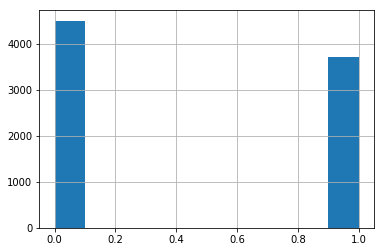

In [15]:
a_train.poor.hist()

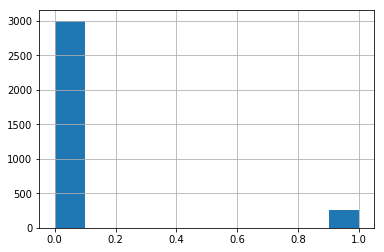

In [16]:
b_train.poor.hist()

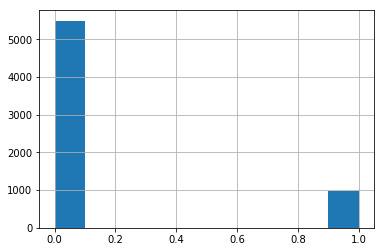

In [17]:
c_train.poor.hist()

## What are the types of columns we have?

Most of the columns are object, thatis categorical, and some of the columns are numeric. 

We might want to normalize the numeric data as a good data cleaning practice.

In [18]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.6+ MB


In [132]:
b_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB


In [20]:
c_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB


## Normalizing Data

Function to perform normalization

In [21]:
# Standardize features
def standardize(df, numeric_only=True):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return df

Creating Training X(features) and Y(lables) datasets.

Performing normaliztion on our training datasets.

We also need to ensure our training and test dataset has same columns set.

In [35]:
print("Country A")
aX_train = standardize(a_train.drop('poor', axis=1))
print(aX_train.shape)
ay_train = 1* np.ravel(a_train.poor)

print("\nCountry B")
bX_train = standardize(b_train.drop('poor', axis=1))
print(bX_train.shape)
by_train = 1* np.ravel(b_train.poor)

print("\nCountry C")
cX_train = standardize(c_train.drop('poor', axis=1))
print(cX_train.shape)
cy_train = 1* np.ravel(c_train.poor)

Country A
(8203, 344)

Country B
(3255, 441)

Country C
(6469, 163)


In [168]:
# process the test data

print("Country A")
a_test = standardize(a_test)
#a_test.fillna(0, inplace=True)
print(a_test.shape)

print("\nCountry B")
b_test = standardize(b_test)
#b_test.fillna(0, inplace=True)
print(b_test.shape)

print("\nCountry C")
c_test = standardize(c_test)
#c_test.fillna(0, inplace=True)
print(c_test.shape)

Country A
(4041, 344)

Country B
(1604, 441)

Country C
(3187, 163)


Now our datasets are ready. A final look and then we can proceed with our model building.

In [26]:
aX_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [94]:
aX_train.shape

(8203, 344)

In [38]:
cy_train[:]

#should be list of 1's and  0's


array([0, 1, 1, ..., 0, 0, 0])

## Building Catboost model 

Catboost will take advantage of the categorical variables here. 

In [143]:
from catboost import CatBoostClassifier

model1 = CatBoostClassifier(iterations=10, learning_rate=1, depth=2, loss_function='Logloss')
model2 = CatBoostClassifier(iterations=10, learning_rate=1, depth=2, loss_function='Logloss')
model3 = CatBoostClassifier(iterations=10, learning_rate=1, depth=2, loss_function='Logloss')

For catboost, we need to specify which columns are categorical using a list of indexes for those columns.

In [144]:
cat_featuresA = aX_train.select_dtypes(include=['object'])
catcolsA = cat_featuresA.columns.tolist()
catindexA = [aX_train.columns.get_loc(c) for c in aX_train.columns if c in cat_featuresA.columns.tolist()]

#courtesy: https://stackoverflow.com/questions/13021654/get-column-index-from-column-name-in-python-pandas

In [145]:
cat_featuresB = bX_train.select_dtypes(include=['object'])
catcolsB = cat_featuresB.columns.tolist()
catindexB = [bX_train.columns.get_loc(c) for c in bX_train.columns if c in cat_featuresB.columns.tolist()]

cat_featuresC = cX_train.select_dtypes(include=['object'])
catcolsC = cat_featuresC.columns.tolist()
catindexC = [cX_train.columns.get_loc(c) for c in cX_train.columns if c in cat_featuresC.columns.tolist()]

## Training our model

In [170]:
print("Training Model 1")
model1.fit(aX_train, ay_train, cat_features = catindexA )
print()

print("Training Model 2")
model2.fit(bX_train, by_train, cat_features = catindexB )
print()

print("Training Model 3")
model3.fit(cX_train, cy_train, cat_features = catindexC )
print()

Training Model 1
0:	learn: 0.5514200	total: 22.4ms	remaining: 202ms
1:	learn: 0.4882279	total: 45ms	remaining: 180ms
2:	learn: 0.4389035	total: 64.4ms	remaining: 150ms
3:	learn: 0.4152441	total: 84.1ms	remaining: 126ms
4:	learn: 0.4027265	total: 105ms	remaining: 105ms
5:	learn: 0.3861111	total: 126ms	remaining: 83.7ms
6:	learn: 0.3797946	total: 145ms	remaining: 62.3ms
7:	learn: 0.3653722	total: 166ms	remaining: 41.4ms
8:	learn: 0.3526840	total: 185ms	remaining: 20.5ms
9:	learn: 0.3417596	total: 205ms	remaining: 0us

Training Model 2
0:	learn: 0.2540779	total: 20.8ms	remaining: 187ms
1:	learn: 0.2477302	total: 40.6ms	remaining: 163ms
2:	learn: 0.2408501	total: 55.6ms	remaining: 130ms
3:	learn: 0.2358322	total: 74ms	remaining: 111ms
4:	learn: 0.2312341	total: 88.6ms	remaining: 88.6ms
5:	learn: 0.2298577	total: 107ms	remaining: 71.2ms
6:	learn: 0.2235978	total: 124ms	remaining: 53ms
7:	learn: 0.2232187	total: 141ms	remaining: 35.2ms
8:	learn: 0.2175700	total: 157ms	remaining: 17.4ms
9:	le

## Evaluating our model

Although accuracy is not the best measure, we can use it to for some primary analysis. 

We will definately try to use some other measure in later models. 

In [172]:
accuracy1 = model1.score(aX_train, ay_train)
accuracy2 = model2.score(bX_train, by_train)
accuracy3 = model3.score(cX_train, cy_train)

print('Accuracy')
print('model1:', accuracy1)
print('model2:',accuracy2)
print('model3:',accuracy3)

Accuracy
model1: 0.847494818969
model2: 0.924116743472
model3: 0.992734580306


## Making predictions on the test set data

In [155]:
a_preds = model1.predict_proba(a_test)

b_preds = model2.predict_proba(b_test)

c_preds = model3.predict_proba(c_test)

In [173]:
a_preds[0:5]

array([[  9.97562232e-02,   9.00243777e-01],
       [  9.94627721e-01,   5.37227878e-03],
       [  1.39506196e-01,   8.60493804e-01],
       [  9.99784314e-01,   2.15686339e-04],
       [  2.38400623e-02,   9.76159938e-01]])

We are intereted in the 2nd column here, since it shows probability of predicting 1's. 

## Creating submission file

Getting our prediction into submission format

In [157]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [159]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')

b_sub = make_country_sub(b_preds, b_test, 'B')

c_sub = make_country_sub(c_preds, c_test, 'C')

In [160]:
submission = pd.concat([a_sub,b_sub,c_sub])

A look at the submission file to ensure everything looks ok.

In [161]:
submission.head()

,country,poor
id,,
418,A,0.900244
41249,A,0.005372
16205,A,0.860494
97501,A,0.000216
67756,A,0.976160


In [174]:
submission.tail()

,country,poor
id,,
6775,C,0.000011
88300,C,0.000011
35424,C,0.000004
81668,C,0.000004
98377,C,0.005350


Creating csv output file for submission.

In [ ]:
submission.to_csv('submission.csv')

Future scope of improvement

*  Using a validation set
*  Using k-fold cross validation
*  Removing outliers(if any) from the numerical columns
*  Fine tuning the catboost model
*  Trying neural network approach
*  Trying ensemble of models
*  Checking which categorocal variable has highest impact in classifying the output
*  Using the independent survey results to add more data.